<a href="https://colab.research.google.com/github/TomKellyGenetics/toy_snp_caller/blob/master/Copy_of_Toy_SNP_caller_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import numpy as np
NUCLEOTIDES = "ACGT"
random.seed(1)

# Function to simulate multiple sequence alignments with errors and either no SNP or heterozygous SNP

In [0]:
def simulate_alignments(reference_length=200, num_alignments = 20000, 
                        coverage = 100, p_sequencing_error = 0.0,
                        p_alignment_error = 0.0):
    alignments = []
    mutation_types = []
    
    for i in range(num_alignments):
        snp_index = reference_length // 2
        if (i % 400 == 0):
            print("Computing alignment ", i)
        reference = [random.choice(NUCLEOTIDES) for _ in range(reference_length)]
        reference_base_at_snp = reference[snp_index]
        snp_base = random.choice([i for i in NUCLEOTIDES if i != reference_base_at_snp])
        mutation_type=random.choice([0,1,2]) # 0 -> no SNP; 1 -> Homozygous SNP; 2 -> Heterozygous SNP
        mutation_types.append(mutation_type)
        
        alignment = [reference]#first read is always the reference
        for _ in range(coverage):
            new_read = [reference[i] if random.random() > p_sequencing_error else random.choice(NUCLEOTIDES) for i in range(reference_length)]
            if random.random() < p_alignment_error:
                snp_index += random.randint(-1,2)
            if mutation_type == 1: #homozygous SNP
                new_read[snp_index] = snp_base
            if mutation_type == 2 and random.random() > 0.5: # heterozygous SNP
                new_read[snp_index] = snp_base

            if random.random() < p_sequencing_error: #Add errors to SNP region also
                new_read[snp_index] =  random.choice(NUCLEOTIDES)
            alignment.append(new_read)
        alignments.append(alignment)
    return alignments, mutation_types

In [3]:
# Compute 2000 alignments
alignments, mutation_types = simulate_alignments(num_alignments=2000)
alignments = np.array(alignments)

Computing alignment  0
Computing alignment  400
Computing alignment  800
Computing alignment  1200
Computing alignment  1600


# Visualise the alignments

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
transdict = {"A":0, "C": 1, "G":2, "T":3}
alignments_ints = np.vectorize(transdict.get)(alignments)
plt.rcParams['figure.dpi'] = 200

## Example one: No mutation - no  errors

Mutation type:  No mutation


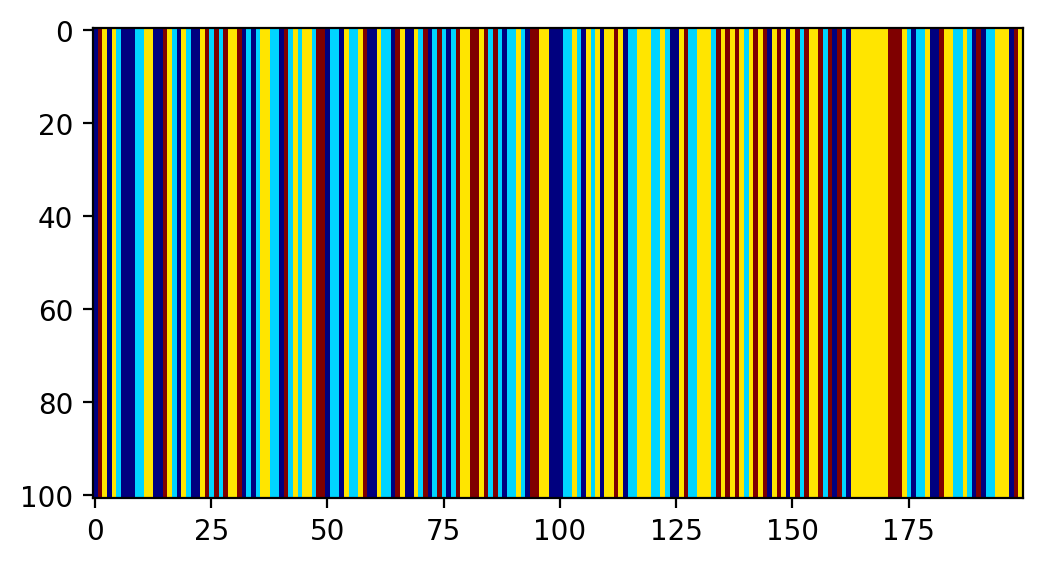

In [6]:
alignment_idx = 1
plt.imshow(alignments_ints[alignment_idx],cmap='jet')
mutation_type_names = {0: "No mutation",
                 1: "Homozygous SNP",
                 2: "Heterozygous SNP"}
print ("Mutation type: ", mutation_type_names[mutation_types[alignment_idx]])

## Example 2: Heterozygous mutation - no errors

Mutation type:  Heterozygous SNP


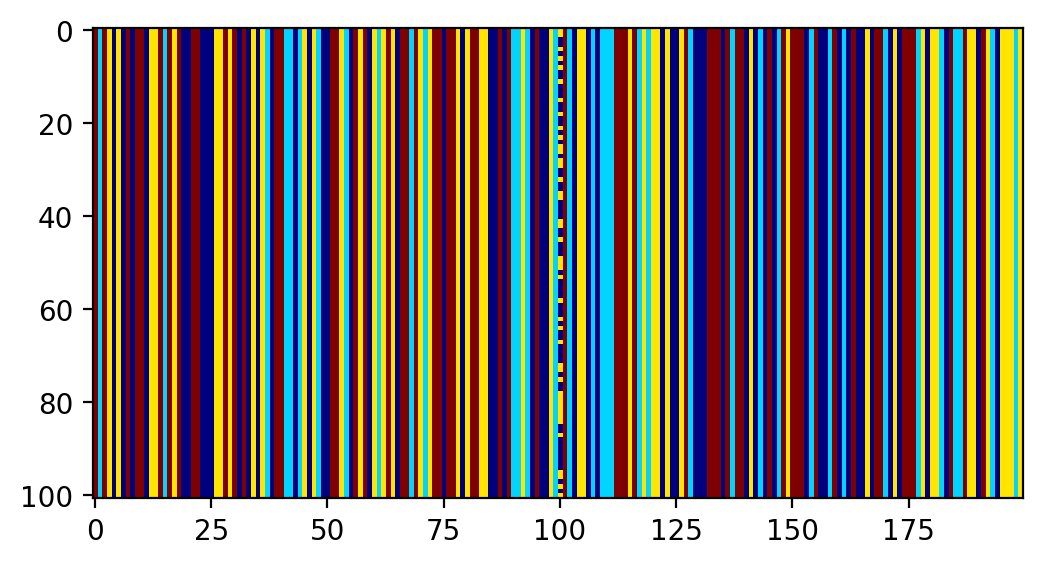

In [7]:
alignment_idx = 5
plt.imshow(alignments_ints[alignment_idx],cmap='jet')
mutation_type_names = {0: "No mutation",
                 1: "Homozygous SNP",
                 2: "Heterozygous SNP"}
print ("Mutation type: ", mutation_type_names[mutation_types[alignment_idx]])

## Example 3: Homozygous mutation - no errors

Mutation type:  Homozygous SNP


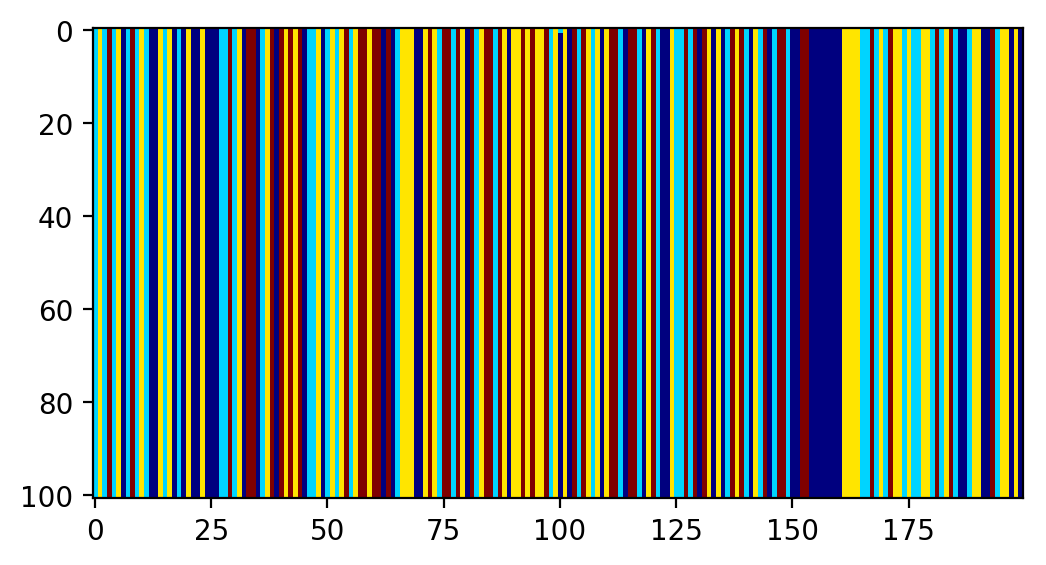

In [8]:
alignment_idx = 8
plt.imshow(alignments_ints[alignment_idx],cmap='jet')
mutation_type_names = {0: "No mutation",
                 1: "Homozygous SNP",
                 2: "Heterozygous SNP"}
print ("Mutation type: ", mutation_type_names[mutation_types[alignment_idx]])

In [9]:
# Compute 2000 alignments
alignments, mutation_types = simulate_alignments(num_alignments=2000, p_alignment_error=0.05, p_sequencing_error=0.15)
alignments = np.array(alignments)
transdict = {"A":0, "C": 1, "G":2, "T":3}
alignments_ints = np.vectorize(transdict.get)(alignments)
plt.rcParams['figure.dpi'] = 200

Computing alignment  0
Computing alignment  400
Computing alignment  800
Computing alignment  1200
Computing alignment  1600


# Example 4: No mutations, sequencing and alignment error

Mutation type:  No mutation


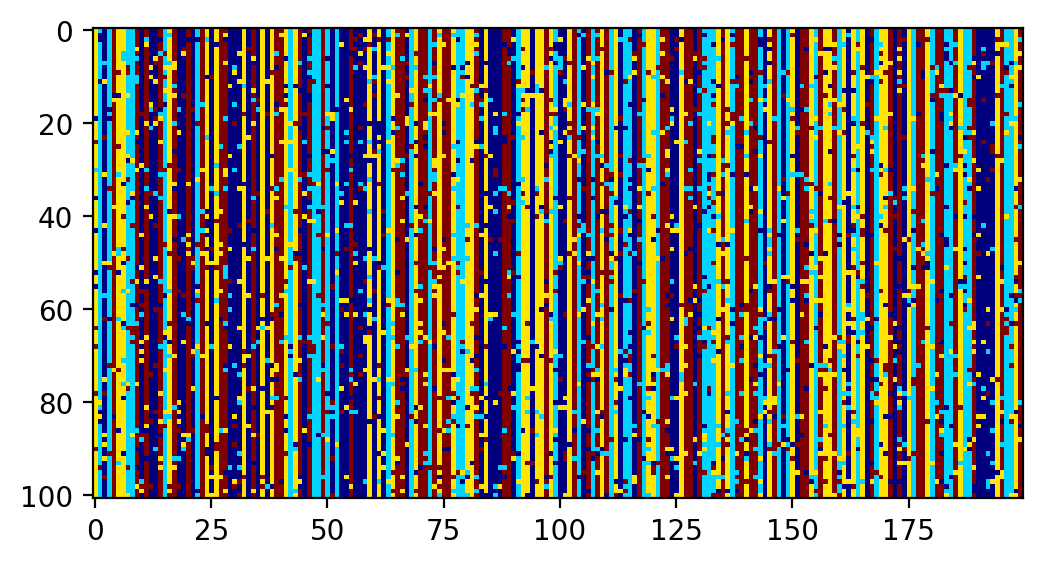

In [10]:
alignment_idx = 3
plt.imshow(alignments_ints[alignment_idx],cmap='jet')
mutation_type_names = {0: "No mutation",
                 1: "Homozygous SNP",
                 2: "Heterozygous SNP"}
print ("Mutation type: ", mutation_type_names[mutation_types[alignment_idx]])

# Exercises

1. Wite a neural network to classify SNPs into homozygous, heterozygous and no mutaiton in the absence of no errors
2. Measure its robustness to sequencing error
3. Measure its robustness to "alignment error"
4. How well does a model trained on one error rate perform on another? Can this model be made more robust for the "real world"?

Exercise: to call variants

- call homozygous or heterozygous (ignore sequencing errors)

Test with MNIST data with 28x28 pixels for each sample (60,000 training, 10,000 test) for 10 groups

In [11]:
#configure keras

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

Using TensorFlow backend.


In [0]:
#Input data

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train[1:10, 1:10, 1:10]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,  62,  81,   0,   0,   0,   0],
        [  0,   0,   0, 126, 163,   0,   0,   0,   0],
        [  0,   0,   0, 220, 163,   0,   0,   0,   0],
        [  0,   0,   0, 222, 163,   0,   0,   0,   0]],

      

In [14]:
#format data

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
#Run Model

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 11s 180us/step - loss: 0.2713 - acc: 0.9165 - val_loss: 0.0580 - val_acc: 0.9819
Epoch 2/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0895 - acc: 0.9738 - val_loss: 0.0451 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0654 - acc: 0.9802 - val_loss: 0.0359 - val_acc: 0.9880
Epoch 4/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0553 - acc: 0.9837 - val_loss: 0.0342 - val_acc: 0.9884
Epoch 5/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0460 - acc: 0.9861 - val_loss: 0.0291 - val_acc: 0.9902
Epoch 6/12
60000/60000 [===========

Run model for simulated alignment data: 100reads x 2000 coverage for 200 loci

In [0]:
#configure keras

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 3
epochs = 20

x is the data (3-d array: image for locus), y are the labels

In [17]:
#Input data

# input image dimensions
img_rows, img_cols = 100, 200

# the data, split between train and test sets
x_train, y_train = simulate_alignments(reference_length=200, num_alignments = 2000,  coverage = 100)
x_test, y_test = simulate_alignments(reference_length=200, num_alignments = 1000,  coverage = 100)

Computing alignment  0
Computing alignment  400
Computing alignment  800
Computing alignment  1200
Computing alignment  1600
Computing alignment  0
Computing alignment  400
Computing alignment  800


We are detecting 3 groups in the labels

In [18]:
from collections import Counter

Counter(y_train)

Counter({0: 639, 1: 690, 2: 671})

In [19]:
#make list data into arrays
#remove first line (reference)
x_train = np.array(x_train)[:,1:101,:]
print(x_train.shape)


x_test = np.array(x_test)[:,1:101,:]
print(x_test.shape)

(2000, 100, 200)
(1000, 100, 200)


In [0]:
x_train = np.vectorize(transdict.get)(x_train)
x_test = np.vectorize(transdict.get)(x_test)

In [21]:
print(x_train.shape)
print(x_test.shape)

(2000, 100, 200)
(1000, 100, 200)


In [22]:
#format data

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise
x_train /= 3
x_test /= 3
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (2000, 100, 200, 1)
2000 train samples
1000 test samples


In [23]:
#Run Model

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2000 samples, validate on 1000 samples
Epoch 1/20
2000/2000 [==============================] - 11s 6ms/step - loss: 3.9115 - acc: 0.3555 - val_loss: 1.0836 - val_acc: 0.4340
Epoch 2/20
2000/2000 [==============================] - 7s 3ms/step - loss: 1.0658 - acc: 0.4375 - val_loss: 1.0731 - val_acc: 0.3480
Epoch 3/20
2000/2000 [==============================] - 7s 3ms/step - loss: 1.0931 - acc: 0.4655 - val_loss: 1.0602 - val_acc: 0.4190
Epoch 4/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.9635 - acc: 0.5175 - val_loss: 0.9988 - val_acc: 0.3420
Epoch 5/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.7888 - acc: 0.5865 - val_loss: 0.6185 - val_acc: 0.6720
Epoch 6/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.7261 - acc: 0.6625 - val_loss: 0.7354 - val_acc: 0.5520
Epoch 7/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.7584 - acc: 0.6140 - val_loss: 0.6333 - val_acc: 0.6730
Epoch 8/20
20

Try again with sequencing errors

In [0]:
#keras setting
batch_size = 128
num_classes = 3
epochs = 20

# input image dimensions
img_rows, img_cols = 101, 200

# the data, split between train and test sets
x_train, y_train = simulate_alignments(reference_length=200, num_alignments = 2000,  coverage = 100,
                                       p_sequencing_error = 0.25, p_alignment_error = 0.01)
x_test, y_test = simulate_alignments(reference_length=200, num_alignments = 1000,  coverage = 100,
                                       p_sequencing_error = 0.25, p_alignment_error = 0.01)
#make list data into arrays
#remove first line (reference)
x_train = np.array(x_train)[:,0:101,:]
x_train = np.vectorize(transdict.get)(x_train)
print(x_train.shape)
x_test = np.array(x_test)[:,0:101,:]
x_test = np.vectorize(transdict.get)(x_test)
print(x_test.shape)
#format data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise
x_train /= 3
x_test /= 3
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Run Model
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Computing alignment  0
Computing alignment  400
Computing alignment  800
Computing alignment  1200
Computing alignment  1600
Computing alignment  0
Computing alignment  400
Computing alignment  800
(2000, 101, 200)
(1000, 101, 200)
x_train shape: (2000, 101, 200, 1)
2000 train samples
1000 test samples
Train on 2000 samples, validate on 1000 samples
Epoch 1/20
2000/2000 [==============================] - 11s 6ms/step - loss: 2.3717 - acc: 0.3190 - val_loss: 1.0995 - val_acc: 0.3250
Epoch 2/20
2000/2000 [==============================] - 7s 3ms/step - loss: 1.0968 - acc: 0.3665 - val_loss: 1.0978 - val_acc: 0.3500
Epoch 3/20
2000/2000 [==============================] - 7s 3ms/step - loss: 1.0841 - acc: 0.4290 - val_loss: 1.1004 - val_acc: 0.3150
Epoch 4/20
2000/2000 [==============================] - 7s 3ms/step - loss: 1.0678 - acc: 0.4615 - val_loss: 1.1084 - val_acc: 0.3420
Epoch 5/20
2000/2000 [==============================] - 7s 3ms/step - loss: 1.0410 - acc: 0.4835 - val_loss: 1.

Try keeping reference sequence(as row 1)

In [0]:
#keras setting
batch_size = 128
num_classes = 3
epochs = 20

# input image dimensions
img_rows, img_cols = 101, 200

# the data, split between train and test sets
x_train, y_train = simulate_alignments(reference_length=200, num_alignments = 2000,  coverage = 100,
                                       p_sequencing_error = 0.0, p_alignment_error = 0.00)
x_test, y_test = simulate_alignments(reference_length=200, num_alignments = 1000,  coverage = 100,
                                       p_sequencing_error = 0.0, p_alignment_error = 0.00)
#make list data into arrays
#remove first line (reference)
x_train = np.array(x_train)#[:,0:101,:]
x_train = np.vectorize(transdict.get)(x_train)
#x_train = np.vectorize(np.argsort)(x_train)
print(x_train.shape)
x_test = np.array(x_test)#[:,0:101,:]
x_test = np.vectorize(transdict.get)(x_test)
#x_test = np.vectorize(np.argsort)(x_test)
print(x_test.shape)
#format data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise
x_train /= 3
x_test /= 3
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Run Model
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
#keras setting
batch_size = 128
num_classes = 3
epochs = 20

# input image dimensions
img_rows, img_cols = 101, 200

# the data, split between train and test sets
x_train, y_train = simulate_alignments(reference_length=200, num_alignments = 2000,  coverage = 100,
                                       p_sequencing_error = 0.25, p_alignment_error = 0.01)
x_test, y_test = simulate_alignments(reference_length=200, num_alignments = 1000,  coverage = 100,
                                       p_sequencing_error = 0.25, p_alignment_error = 0.01)
#make list data into arrays
#remove first line (reference)
x_train = np.array(x_train)#[:,0:101,:]
x_train = np.vectorize(transdict.get)(x_train)
#x_train = np.vectorize(np.argsort)(x_train)
print(x_train.shape)
x_test = np.array(x_test)#[:,0:101,:]
x_test = np.vectorize(transdict.get)(x_test)
#x_test = np.vectorize(np.argsort)(x_test)
print(x_test.shape)
#format data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise
x_train /= 3
x_test /= 3
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Run Model
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Compare each read to reference


In [0]:
#make list data into arrays
#convert strings to integrers
x_train = np.array(x_train)#[:,1:101,:]
x_train = np.vectorize(transdict.get)(x_train)
x_train = np.where(x_train[:,0:1, :] == x_train[:, 1:101, :], 0, 1)
#remove first line (reference)
x_train = np.array(x_train)#[:,1:101,:]
#x_train = np.vectorize(np.argsort)(x_train)
print(x_train.shape)
x_test = np.array(x_test)#[:,1:101,:]
x_test = np.vectorize(transdict.get)(x_test)
x_test = np.where(x_test[:,0:1, :] == x_test[:, 1:101, :], 0, 1)
print(x_test.shape)

In [0]:
x_train[1:3, 1:5, 1:10]

In [0]:
#keras setting
batch_size = 128
num_classes = 3
epochs = 50

# input image dimensions
img_rows, img_cols = 100, 200

# the data, split between train and test sets
x_train, y_train = simulate_alignments(reference_length=200, num_alignments = 2000,  coverage = 100,
                                       p_sequencing_error = 0.25, p_alignment_error = 0.01)
x_test, y_test = simulate_alignments(reference_length=200, num_alignments = 1000,  coverage = 100,
                                       p_sequencing_error = 0.25, p_alignment_error = 0.01)
#make list data into arrays
#convert strings to integrers
x_train = np.array(x_train)#[:,1:101,:]
x_train = np.vectorize(transdict.get)(x_train)
x_train = np.where(x_train[:,0:1, :] == x_train[:, 1:101, :], 0, 1)
#remove first line (reference)
x_train = np.array(x_train)#[:,1:101,:]
#x_train = np.vectorize(np.argsort)(x_train)
print(x_train.shape)
x_test = np.array(x_test)#[:,1:101,:]
x_test = np.vectorize(transdict.get)(x_test)
x_test = np.where(x_test[:,0:1, :] == x_test[:, 1:101, :], 0, 1)
print(x_test.shape)
#format data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise
x_train /= 3
x_test /= 3
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Run Model
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Low error rate

In [0]:
#keras setting
batch_size = 128
num_classes = 3
epochs = 50

# input image dimensions
img_rows, img_cols = 100, 200

# the data, split between train and test sets
x_train, y_train = simulate_alignments(reference_length=200, num_alignments = 2000,  coverage = 100,
                                       p_sequencing_error = 0.05, p_alignment_error = 0.01)
x_test, y_test = simulate_alignments(reference_length=200, num_alignments = 1000,  coverage = 100,
                                       p_sequencing_error = 0.05, p_alignment_error = 0.01)
#make list data into arrays
#convert strings to integrers
x_train = np.array(x_train)#[:,1:101,:]
x_train = np.vectorize(transdict.get)(x_train)
x_train = np.where(x_train[:,0:1, :] == x_train[:, 1:101, :], 0, 1)
#remove first line (reference)
x_train = np.array(x_train)#[:,1:101,:]
#x_train = np.vectorize(np.argsort)(x_train)
print(x_train.shape)
x_test = np.array(x_test)#[:,1:101,:]
x_test = np.vectorize(transdict.get)(x_test)
x_test = np.where(x_test[:,0:1, :] == x_test[:, 1:101, :], 0, 1)
print(x_test.shape)
#format data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise
x_train /= 3
x_test /= 3
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Run Model
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Does it perform on perfect data?

In [0]:
#keras setting
batch_size = 128
num_classes = 3
epochs = 50

# input image dimensions
img_rows, img_cols = 100, 200

# the data, split between train and test sets
x_train, y_train = simulate_alignments(reference_length=200, num_alignments = 2000,  coverage = 100,
                                       p_sequencing_error = 0.05, p_alignment_error = 0.01)
x_test, y_test = simulate_alignments(reference_length=200, num_alignments = 1000,  coverage = 100,
                                       p_sequencing_error = 0.00, p_alignment_error = 0.00)
#make list data into arrays
#convert strings to integrers
x_train = np.array(x_train)#[:,1:101,:]
x_train = np.vectorize(transdict.get)(x_train)
x_train = np.where(x_train[:,0:1, :] == x_train[:, 1:101, :], 0, 1)
#remove first line (reference)
x_train = np.array(x_train)#[:,1:101,:]
#x_train = np.vectorize(np.argsort)(x_train)
print(x_train.shape)
x_test = np.array(x_test)#[:,1:101,:]
x_test = np.vectorize(transdict.get)(x_test)
x_test = np.where(x_test[:,0:1, :] == x_test[:, 1:101, :], 0, 1)
print(x_test.shape)
#format data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise
x_train /= 3
x_test /= 3
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Run Model
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Higher error rate in test data than training (test for overfitting)

In [0]:
#keras setting
batch_size = 128
num_classes = 3
epochs = 50

# input image dimensions
img_rows, img_cols = 100, 200

# the data, split between train and test sets
x_train, y_train = simulate_alignments(reference_length=200, num_alignments = 2000,  coverage = 100,
                                       p_sequencing_error = 0.10, p_alignment_error = 0.01)
x_test, y_test = simulate_alignments(reference_length=200, num_alignments = 1000,  coverage = 100,
                                       p_sequencing_error = 0.01, p_alignment_error = 0.01)
#make list data into arrays
#convert strings to integrers
x_train = np.array(x_train)#[:,1:101,:]
x_train = np.vectorize(transdict.get)(x_train)
x_train = np.where(x_train[:,0:1, :] == x_train[:, 1:101, :], 0, 1)
#remove first line (reference)
x_train = np.array(x_train)#[:,1:101,:]
#x_train = np.vectorize(np.argsort)(x_train)
print(x_train.shape)
x_test = np.array(x_test)#[:,1:101,:]
x_test = np.vectorize(transdict.get)(x_test)
x_test = np.where(x_test[:,0:1, :] == x_test[:, 1:101, :], 0, 1)
print(x_test.shape)
#format data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise
x_train /= 3
x_test /= 3
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Run Model
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])